# House Price Prediction

### Project Objectives

#### Table of Content

1. [Data Importation](#Data-Importation)
2. [Exploratory Data Analysis](#Exploratory-Data-Analysis)
3. [Feature Engineering](#Feature-Engineering)
4. [Models Building](#Models-Building)
5. [Model Comparison and Selection](#Model-Comparison-and-Selection)
6. [Feature Importance](#Feature-Importance)
7. [Conclusion and recommendation](#Conclusion-and-Recommendations)

## Importing Packages

In [236]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import datetime

from sklearn.metrics import mean_squared_error
from sklearn.linear_model  import LassoCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import lightgbm as lgb
from lightgbm import LGBMRegressor

from statsmodels.formula.api import ols
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

### Data Importation

In [237]:
train = pd.read_csv(r"C:\Users\lily\Desktop\IT alapok privát\PRIV DATA SC 1204\Machine learning\0411 regression project\train_p.csv")

In [238]:
#train = pd.read_csv('/content/train_p.csv')

In [239]:
train.head()

id  squareMeters  numberOfRooms  hasYard  hasPool  floors  cityCode  \
0   0         34291             24        1        0      47     35693   
1   1         95145             60        0        1      60     34773   
2   2         92661             45        1        1      62     45457   
3   3         97184             99        0        0      59     15113   
4   4         61752            100        0        0      57     64245   

   cityPartRange  numPrevOwners  made  isNewBuilt  hasStormProtector  \
0              2              1  2000           0                  1   
1              1              4  2000           0                  1   
2              4              8  2020           1                  1   
3              1              1  2000           0                  1   
4              8              4  2018           1                  0   

   basement  attic  garage  hasStorageRoom  hasGuestRoom       price  
0         8   5196     369               0             3 3436795.200  
1       729   4496     277               0             6 9519958.000  
2      7473   8953     245               1             9 9276448.100  
3      6424   8522     256               1             9 9725732.200  
4      7151   2786     863               0             7 6181908.800

In [240]:
#test = pd.read_csv(r"C:\Users\lily\Desktop\IT alapok privát\PRIV DATA SC 1204\Machine learning\0411 regression project\test_p.csv")

# Exploratory Data Analysis

In [241]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22730 entries, 0 to 22729
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 22730 non-null  int64  
 1   squareMeters       22730 non-null  int64  
 2   numberOfRooms      22730 non-null  int64  
 3   hasYard            22730 non-null  int64  
 4   hasPool            22730 non-null  int64  
 5   floors             22730 non-null  int64  
 6   cityCode           22730 non-null  int64  
 7   cityPartRange      22730 non-null  int64  
 8   numPrevOwners      22730 non-null  int64  
 9   made               22730 non-null  int64  
 10  isNewBuilt         22730 non-null  int64  
 11  hasStormProtector  22730 non-null  int64  
 12  basement           22730 non-null  int64  
 13  attic              22730 non-null  int64  
 14  garage             22730 non-null  int64  
 15  hasStorageRoom     22730 non-null  int64  
 16  hasGuestRoom       227

Comment: No missing values and all data types looks correct.

In [242]:
train.describe()

id  squareMeters  numberOfRooms   hasYard   hasPool    floors  \
count 22730.000     22730.000      22730.000 22730.000 22730.000 22730.000   
mean  11364.500     46586.218         48.241     0.476     0.453    47.306   
std    6561.730     49521.245         28.226     0.499     0.498    47.777   
min       0.000        89.000          1.000     0.000     0.000     1.000   
25%    5682.250     20392.750         25.000     0.000     0.000    25.000   
50%   11364.500     44484.000         47.000     0.000     0.000    45.000   
75%   17046.750     71547.000         75.000     1.000     1.000    69.000   
max   22729.000   6071330.000        100.000     1.000     1.000  6000.000   

        cityCode  cityPartRange  numPrevOwners      made  isNewBuilt  \
count  22730.000      22730.000      22730.000 22730.000   22730.000   
mean   50013.796          5.585          5.621  2008.005       0.468   
std    30006.638          2.740          2.713   118.827       0.499   
min        3.000          1.000          1.000  1990.000       0.000   
25%    22936.000          3.000          3.000  2000.000       0.000   
50%    50414.000          6.000          6.000  2006.000       0.000   
75%    76291.000          8.000          8.000  2014.000       1.000   
max   491100.000         10.000         10.000 10000.000       1.000   

       hasStormProtector  basement     attic    garage  hasStorageRoom  \
count          22730.000 22730.000 22730.000 22730.000       22730.000   
mean               0.460  5283.647  5067.982   530.470           0.462   
std                0.498  3047.084  3097.348   274.841           0.499   
min                0.000     4.000     1.000     4.000           0.000   
25%                0.000  2977.250  2599.000   297.000           0.000   
50%                0.000  5359.000  4977.000   515.000           0.000   
75%                1.000  7746.000  7652.000   767.000           1.000   
max                1.000 91992.000 96381.000  9017.000           1.000   

       hasGuestRoom        price  
count     22730.000    22730.000  
mean          5.153  4634456.897  
std           3.055  2925163.241  
min           0.000    10313.500  
25%           3.000  2041739.100  
50%           5.000  4450823.400  
75%           8.000  7159919.500  
max          10.000 10004278.300

Comment: Data transformation will be needed

In [243]:
train.duplicated().sum()

0

In [244]:
train.columns

Index(['id', 'squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors',
       'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt',
       'hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom',
       'hasGuestRoom', 'price'],
      dtype='object')

Binary features: hasYard, hasPool, isNewBuilt, hasStormProtector, hasStorageRoom, hasGuestRoom

In [245]:
for column in train.columns:
    print(f"Value counts for column '{column}':")
    print(train[column].value_counts())
    print()

Value counts for column 'id':
id
0        1
15182    1
15158    1
15157    1
15156    1
        ..
7575     1
7574     1
7573     1
7572     1
22729    1
Name: count, Length: 22730, dtype: int64

Value counts for column 'squareMeters':
squareMeters
925      19
54369    17
85184    17
965      17
44698    17
         ..
97952     1
32121     1
39756     1
97843     1
55825     1
Name: count, Length: 7319, dtype: int64

Value counts for column 'numberOfRooms':
numberOfRooms
26    935
38    855
86    642
35    604
58    581
     ... 
53     53
90     43
31     41
40     39
72     37
Name: count, Length: 100, dtype: int64

Value counts for column 'hasYard':
hasYard
0    11913
1    10817
Name: count, dtype: int64

Value counts for column 'hasPool':
hasPool
0    12439
1    10291
Name: count, dtype: int64

Value counts for column 'floors':
floors
35      792
38      690
50      657
37      482
49      470
       ... 
53       56
66       52
93       37
92       31
6000      1
Name: count, Len

In [246]:
train['cityCode'].value_counts()

cityCode
1906     69
42634    35
42626    35
3545     32
426      31
         ..
6688      1
91673     1
72462     1
41026     1
50813     1
Name: count, Length: 7810, dtype: int64

In [247]:
train['cityCode'].nunique()

7810

Comment: Citycode looks like more categorical variable rather than simple figures, so in case of not encoding, to be considered for being dropped.

In [248]:
train['cityPartRange'].value_counts()

cityPartRange
8     3255
5     2957
2     2262
7     2237
9     2224
4     2169
6     2134
3     1925
1     1889
10    1678
Name: count, dtype: int64

In [249]:
eda = train[['squareMeters', 'numberOfRooms','floors','cityCode', 'cityPartRange', 'numPrevOwners', 'made','basement', 'attic', 'garage','price']]

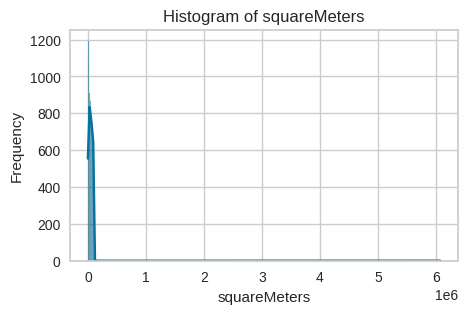

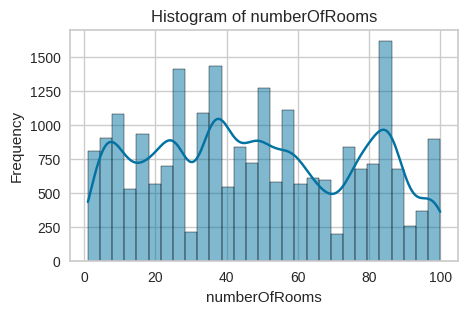

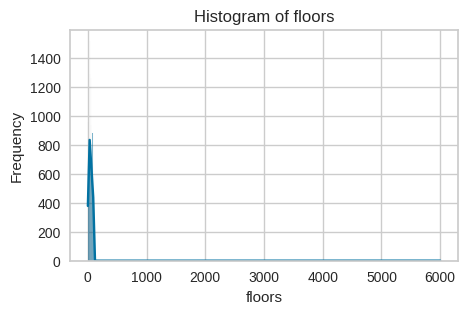

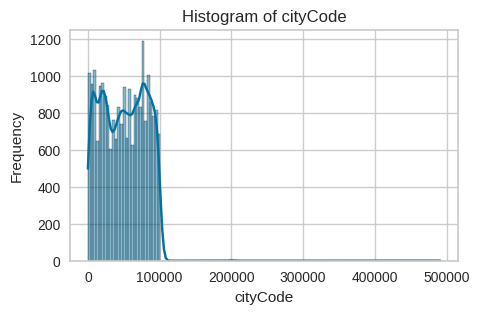

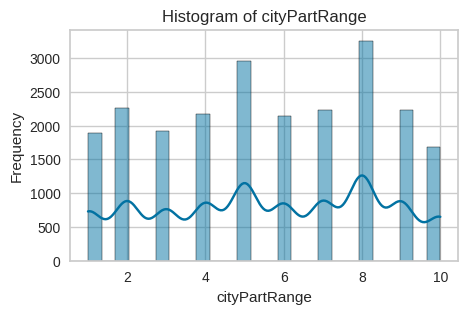

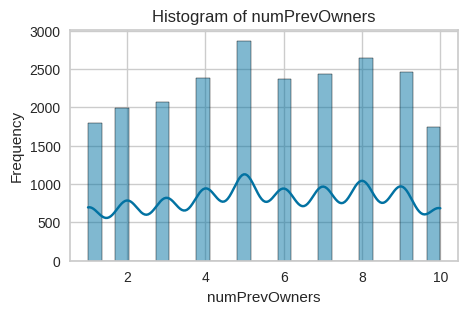

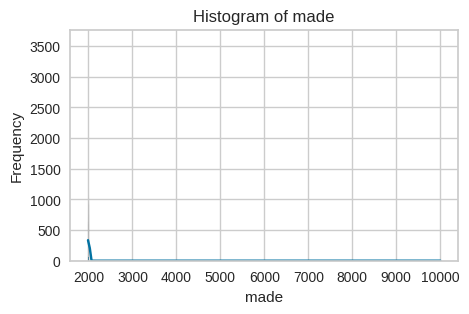

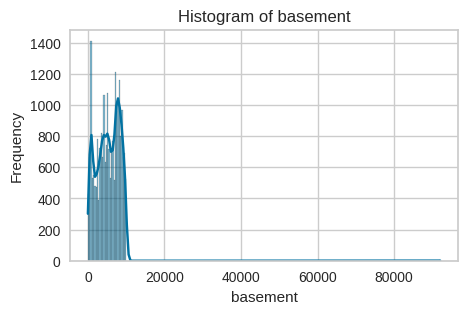

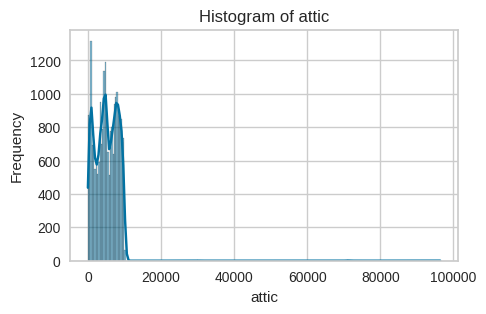

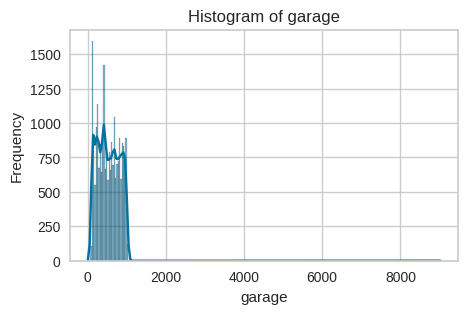

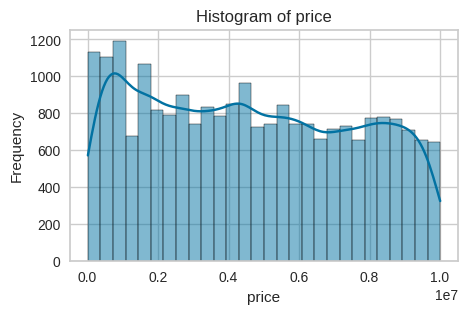

In [250]:
for column in eda.columns:
    plt.figure(figsize=(5,3))
    sns.histplot(data=eda, x=column, kde=True)
    plt.title(f"Histogram of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

Comment: There are quite a lot of outliers almost in all the columns except for the discreet values: citypartrange, numberofpreviousowner

In [251]:
train['made'].value_counts().sort_values()

made
2002        1
10000       5
1991       30
2012       51
1992       59
2001       59
2011       68
1990       77
2021      110
2010      152
1999      588
1997      592
2020      595
1994      628
1995      631
1993      651
1998      719
2017      741
2005      764
1996      822
2016      910
2004      915
2006      921
2018      927
2013      934
2019      956
2009      972
2008      981
2007     1021
2015     1036
2014     1070
2003     1156
2000     3588
Name: count, dtype: int64

10 000 looks like mistake, since there are only 5, will drop them

In [252]:
train.drop(train[train['made'] == 10000].index, inplace=True)

<Axes: xlabel='made', ylabel='Count'>

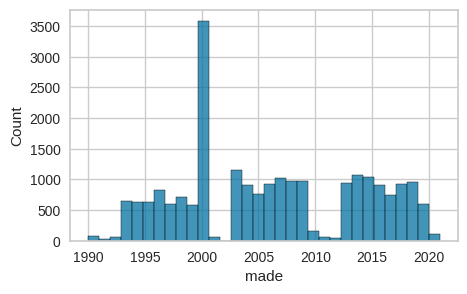

In [253]:
plt.figure(figsize=(5,3))
sns.histplot(data=train['made'])

In [254]:
train['squareMeters'].value_counts().sort_index(ascending=False)

squareMeters
6071330     1
146181      1
99985       4
99952       3
99932       1
           ..
141         6
137         4
123         4
111         1
89         12
Name: count, Length: 7319, dtype: int64

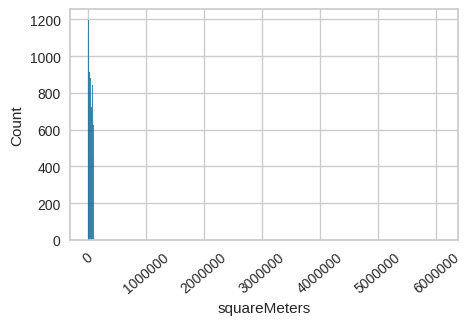

In [255]:
import matplotlib.ticker as ticker

plt.figure(figsize=(5,3))
sns.histplot(data=train['squareMeters'])

plt.gca().xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
plt.xticks(rotation=40)
plt.show()

In [256]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [257]:
train['squareMeters'].describe()

count     22725.00
mean      46579.38
std       49524.50
min          89.00
25%       20392.00
50%       44484.00
75%       71541.00
max     6071330.00
Name: squareMeters, dtype: float64

In [258]:
train['squareMeters'].median()

44484.0

In [259]:
train['squareMeters'].quantile(0.75)

71541.0

In [260]:
filtered_data = train[train['squareMeters'] > 8000]

In [261]:
filtered_data.head()

id  squareMeters  numberOfRooms  hasYard  hasPool  floors  cityCode  \
0   0         34291             24        1        0      47     35693   
1   1         95145             60        0        1      60     34773   
2   2         92661             45        1        1      62     45457   
3   3         97184             99        0        0      59     15113   
4   4         61752            100        0        0      57     64245   

   cityPartRange  numPrevOwners  made  isNewBuilt  hasStormProtector  \
0              2              1  2000           0                  1   
1              1              4  2000           0                  1   
2              4              8  2020           1                  1   
3              1              1  2000           0                  1   
4              8              4  2018           1                  0   

   basement  attic  garage  hasStorageRoom  hasGuestRoom      price  
0         8   5196     369               0             3 3436795.20  
1       729   4496     277               0             6 9519958.00  
2      7473   8953     245               1             9 9276448.10  
3      6424   8522     256               1             9 9725732.20  
4      7151   2786     863               0             7 6181908.80

In [262]:
len(filtered_data)

20274

Since we have quite a lot of houses with above 8000 sqmeters, therefore most likely these are not normal decent houses where the families are living, so these figures might not be considered as outliers.

#### Outlier treatment

Will remove the outliers now for all except for the target - will check price separately

In [263]:
non_outlier_condition = (
    (train['squareMeters'] < train['squareMeters'].quantile(0.98)) &
    (train['numberOfRooms'] < train['numberOfRooms'].quantile(0.98)) &
    (train['floors'] < train['floors'].quantile(0.98)) &
    (train['basement'] < train['basement'].quantile(0.98)) &
    (train['attic'] < train['attic'].quantile(0.98)) &
    (train['garage'] < train['garage'].quantile(0.98))
)

In [264]:
train.drop('id', axis=1).head()

squareMeters  numberOfRooms  hasYard  hasPool  floors  cityCode  \
0         34291             24        1        0      47     35693   
1         95145             60        0        1      60     34773   
2         92661             45        1        1      62     45457   
3         97184             99        0        0      59     15113   
4         61752            100        0        0      57     64245   

   cityPartRange  numPrevOwners  made  isNewBuilt  hasStormProtector  \
0              2              1  2000           0                  1   
1              1              4  2000           0                  1   
2              4              8  2020           1                  1   
3              1              1  2000           0                  1   
4              8              4  2018           1                  0   

   basement  attic  garage  hasStorageRoom  hasGuestRoom      price  
0         8   5196     369               0             3 3436795.20  
1       729   4496     277               0             6 9519958.00  
2      7473   8953     245               1             9 9276448.10  
3      6424   8522     256               1             9 9725732.20  
4      7151   2786     863               0             7 6181908.80

In [265]:
train_cleaned = train[non_outlier_condition]

In [266]:
train_cleaned.shape

(19955, 18)

In [267]:
eda_cl= train_cleaned[['squareMeters', 'numberOfRooms','floors','cityCode', 'cityPartRange', 'numPrevOwners', 'made','basement', 'attic', 'garage','price']]

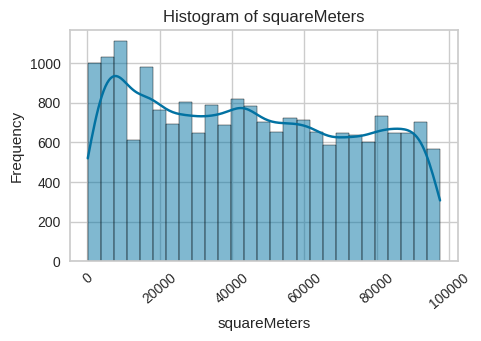

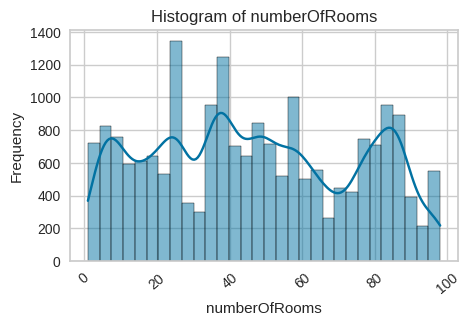

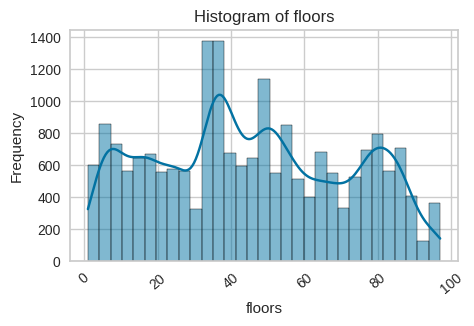

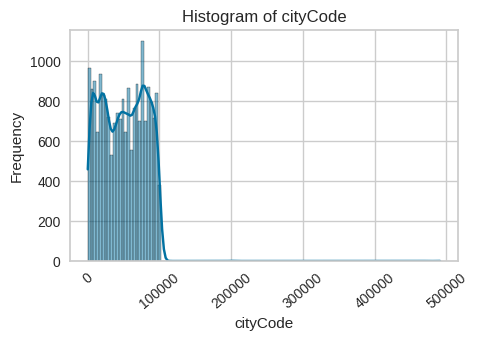

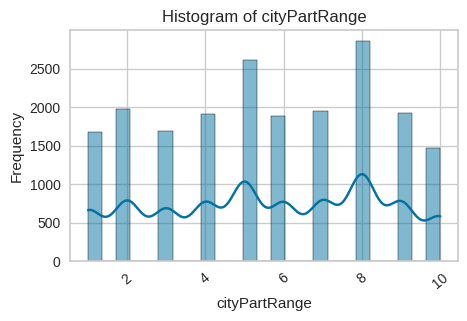

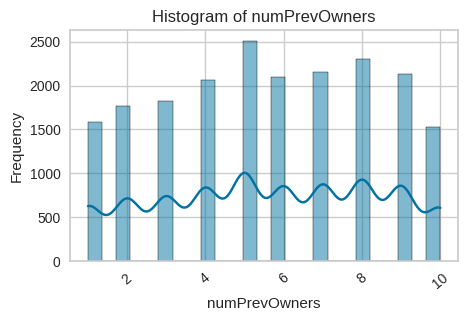

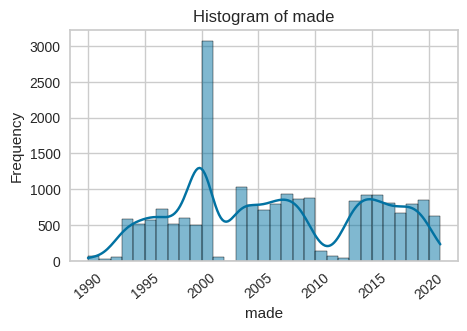

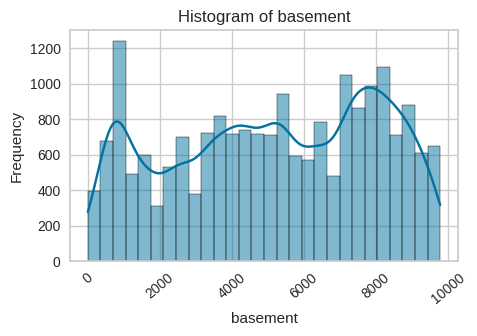

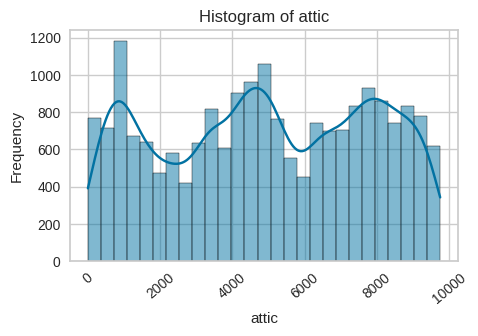

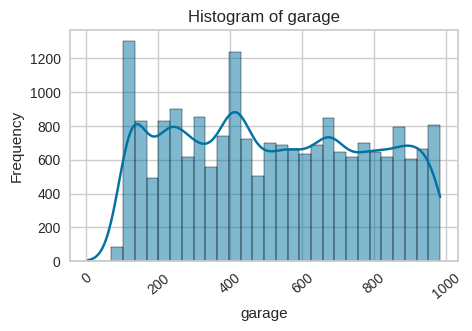

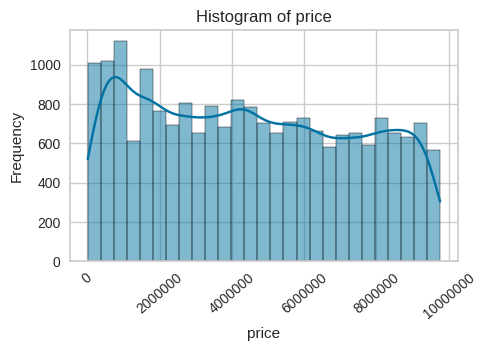

In [268]:
for column in eda_cl.columns:
    plt.figure(figsize=(5,3))
    sns.histplot(data=eda_cl, x=column, kde=True)
    plt.title(f"Histogram of {column}")
    plt.gca().xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
    plt.xticks(rotation=40)
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

<Axes: xlabel='floors', ylabel='Count'>

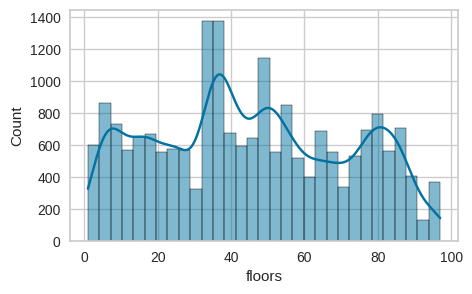

In [269]:
plt.figure(figsize=(5,3))
sns.histplot(train_cleaned['floors'],kde=True)

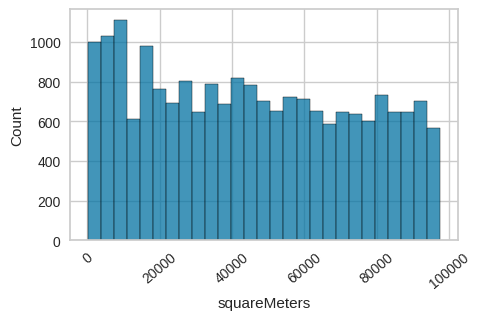

In [270]:
plt.figure(figsize=(5,3))
sns.histplot(data=train_cleaned['squareMeters'])

plt.gca().xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
plt.xticks(rotation=40)
plt.show()

In [271]:
19955 / 22730

0.877914650241971

Comment: 12% dropped from all the dataset

#### Target variable analysis

Comment: compare the target variable before and after the outlier removal

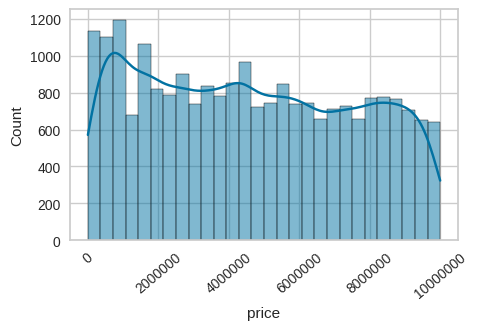

In [272]:
plt.figure(figsize=(5,3))
sns.histplot(train['price'], kde=True)
plt.gca().xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
plt.xticks(rotation=40)
plt.show()

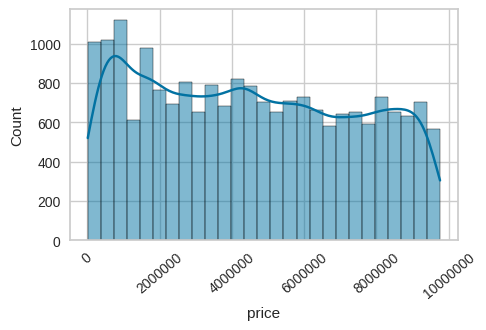

In [273]:
plt.figure(figsize=(5,3))
sns.histplot(train_cleaned['price'], kde=True)
plt.gca().xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
plt.xticks(rotation=40)
plt.show()

In [274]:
train_cleaned['price'].value_counts().sort_index(ascending=True)   #.tail(20)

price
10313.50      11
13229.10       4
14431.30       1
16799.20       1
17363.00       2
              ..
9752798.20     2
9753797.50     6
9756243.30     1
9756768.40     8
9759389.80     1
Name: count, Length: 6959, dtype: int64

In [275]:
train_cleaned['price'].median()

4354494.3

In [276]:
train_cleaned['price'].max()

9759389.8

In [277]:
train_cleaned['price'].mode()

0   107936.90
Name: price, dtype: float64

In [278]:
train_cleaned['price'].skew()

0.13961473576874361

In [279]:
df = train_cleaned.copy()

Double check for stray values

In [280]:
numeric_vals = pd.to_numeric(train_cleaned['price'],errors = 'coerce')

In [281]:
numeric_vals

0       3436795.20
1       9519958.00
2       9276448.10
5       3033117.80
6       1944096.70
           ...    
22725   5594137.10
22726   6594705.00
22727   9321511.40
22728   6584708.20
22729   8231424.80
Name: price, Length: 19955, dtype: float64

In [282]:
idx = numeric_vals.isna()

In [283]:
print(train_cleaned['price'][idx])

Series([], Name: price, dtype: float64)


In [284]:
train_cleaned['price'][idx].unique()

array([], dtype=float64)

[Click here to go back to the table of content](#Table-of-Content)

## Feature Engineering

In [285]:
df.head()

id  squareMeters  numberOfRooms  hasYard  hasPool  floors  cityCode  \
0   0         34291             24        1        0      47     35693   
1   1         95145             60        0        1      60     34773   
2   2         92661             45        1        1      62     45457   
5   5         30300             36        0        0      35     19069   
6   6         19341             95        1        0      37     23939   

   cityPartRange  numPrevOwners  made  isNewBuilt  hasStormProtector  \
0              2              1  2000           0                  1   
1              1              4  2000           0                  1   
2              4              8  2020           1                  1   
5              8              4  1998           1                  0   
6              9              6  2017           0                  0   

   basement  attic  garage  hasStorageRoom  hasGuestRoom      price  
0         8   5196     369               0             3 3436795.20  
1       729   4496     277               0             6 9519958.00  
2      7473   8953     245               1             9 9276448.10  
5      8181   1826     589               0             0 3033117.80  
6      7173   9233     101               0             3 1944096.70

In [286]:
current_year = datetime.datetime.now().year

In [287]:
df['age'] = current_year - df['made']

In [288]:
df['extra_rooms'] = df['basement'] + df['attic'] + df['garage'] + df['hasStorageRoom'] + df['hasGuestRoom']

In [289]:
df['is_luxury'] = (df['hasYard'] == 1) & (df['hasPool'] == 1) & (df['hasStormProtector'] == 1)

In [290]:
df.columns

Index(['id', 'squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors',
       'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt',
       'hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom',
       'hasGuestRoom', 'price', 'age', 'extra_rooms', 'is_luxury'],
      dtype='object')

In [291]:
order = ['squareMeters', 'numberOfRooms', 'extra_rooms', 'age', 'floors',
       'cityPartRange', 'numPrevOwners','isNewBuilt','price' ]

Comment: Notice that 'id', 'made', 'basement', 'attic', 'garage + 'hasStorageRoom', 'hasGuestRoom', 'hasYard', 'hasPool', 'hasStormProtector' and cityCode is dropped

In [292]:
df = df[order]

In [293]:
df.head()

squareMeters  numberOfRooms  extra_rooms  age  floors  cityPartRange  \
0         34291             24         5576   24      47              2   
1         95145             60         5508   24      60              1   
2         92661             45        16681    4      62              4   
5         30300             36        10596   26      35              8   
6         19341             95        16510    7      37              9   

   numPrevOwners  isNewBuilt      price  
0              1           0 3436795.20  
1              4           0 9519958.00  
2              8           1 9276448.10  
5              4           1 3033117.80  
6              6           0 1944096.70

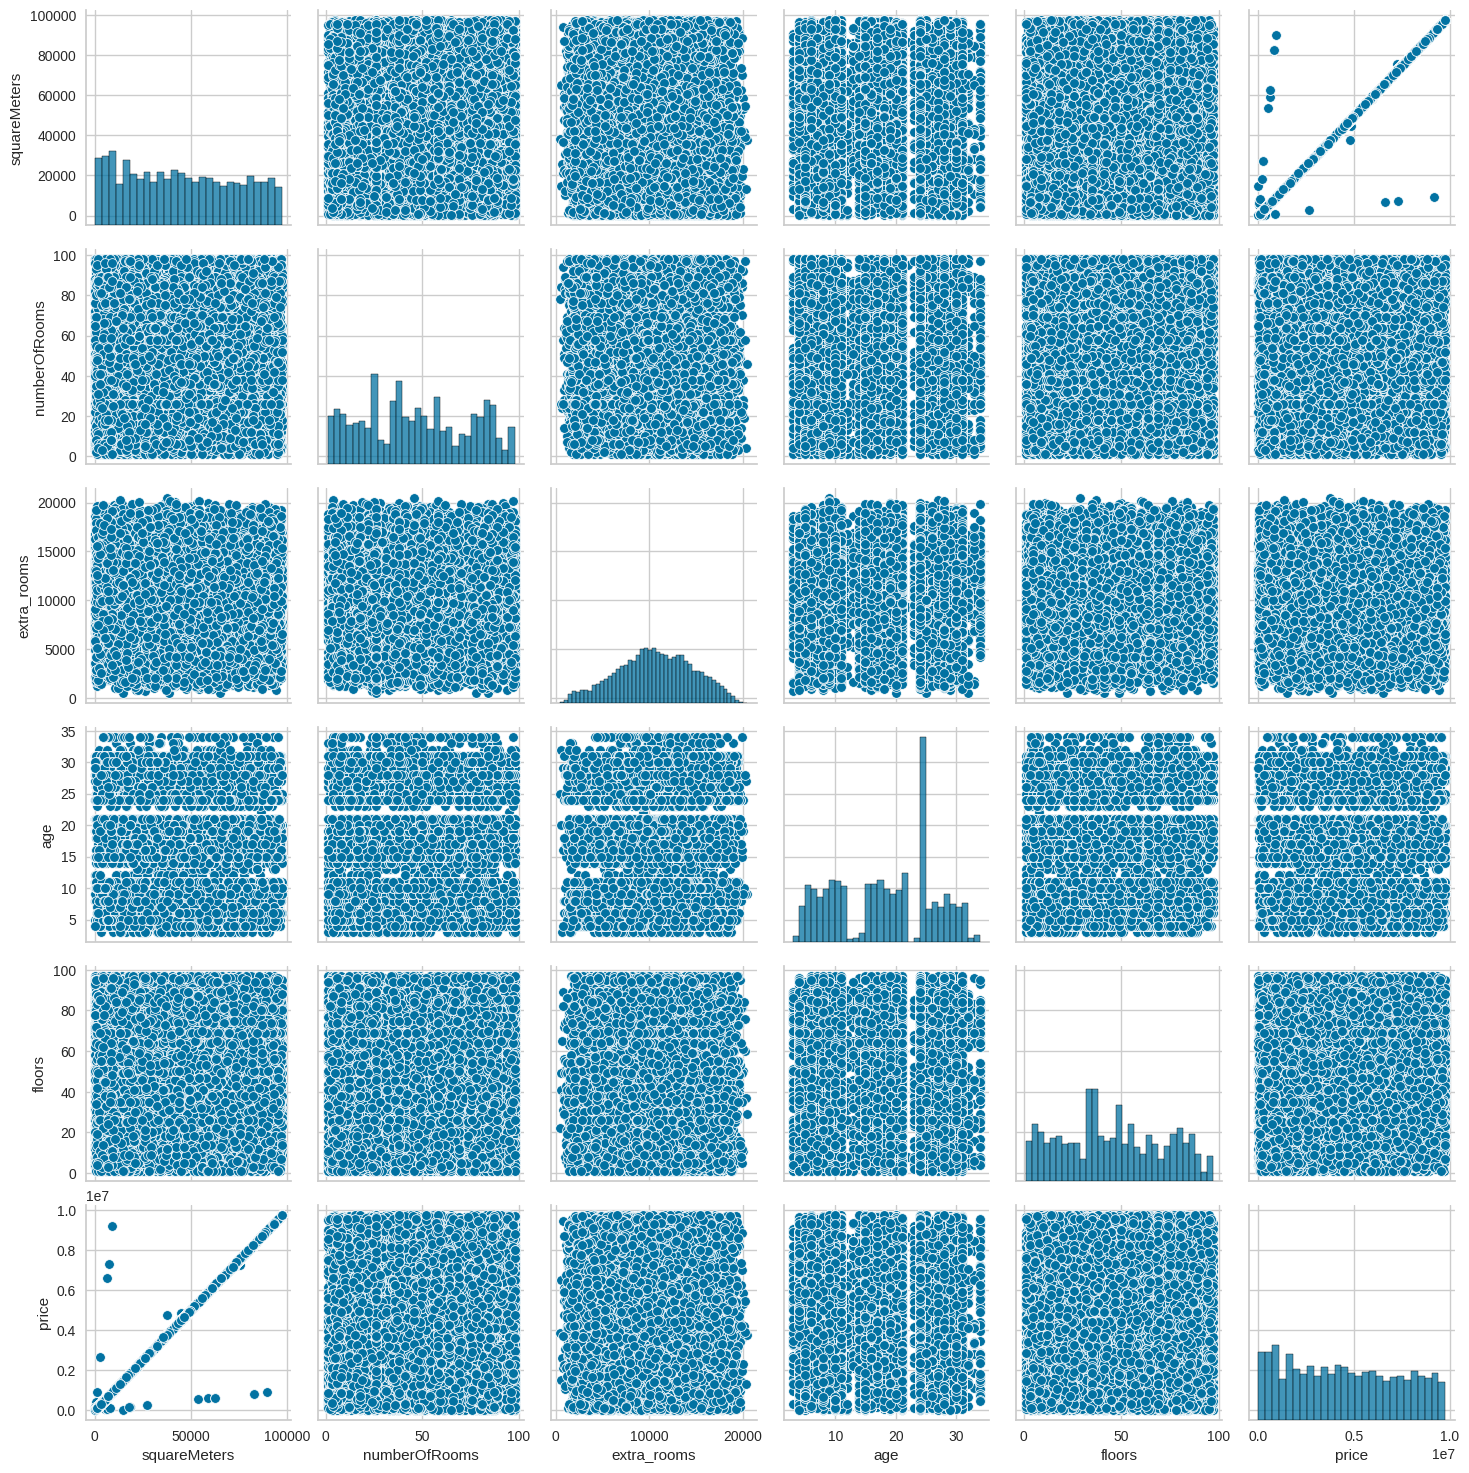

In [294]:
sns.pairplot(data=df[['squareMeters', 'numberOfRooms', 'extra_rooms', 'age', 'floors', 'price']])
plt.show()

*Comment: checking for linear correlation*

<Axes: >

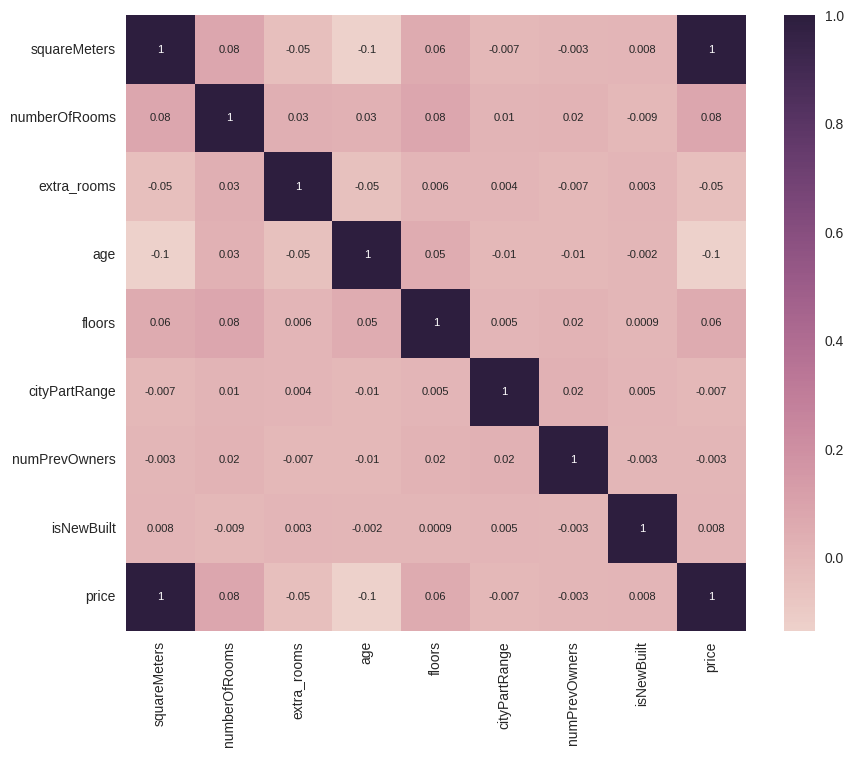

In [295]:
plt.figure(figsize = (10,8))
colormap = sns.cubehelix_palette(as_cmap=True)
sns.heatmap(df.corr(), annot=True, fmt='.1g', cmap=colormap, annot_kws={"fontsize": 8})

It's not uncommon to observe high R-squared (R2) scores and low Pearson correlation coefficients between individual features and the target variable in regression analysis. Possible reasons:


 * Non-linear Relationships: Linear regression assumes a linear relationship between the independent variables and the target variable. However, it's possible for the true relationship to be non-linear. In such cases, even though the Pearson correlation coefficients are low, the linear regression model can still capture the underlying patterns effectively, resulting in a high R2 score.

 * Multicollinearity: Multicollinearity occurs when independent variables in the regression model are highly correlated with each other. In the presence of multicollinearity, individual variables may have low correlation with the target variable but collectively contribute to explaining the variance in the target variable. Linear regression can still capture the combined effect of these variables, leading to a high R2 score.  



[Click here to go back to the table of content](#Table-of-Content)

### Data Preparation for Modelling - Splitting the dataset

In [296]:
X = df.drop('price', axis=1)

In [297]:
y = df['price']

In [298]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)

## Models Building

Will try different method to select the proper model for machine learning predicitons:

        LassoCV
        Random Forest
        Adaboost
        LightGBM

### Model 1

#### Lasso regression

In [299]:
lcv=LassoCV()
lcv.fit(X_train, y_train)
lcv.score(X_test, y_test)

0.9955691138021977

In [300]:
y_pred = lcv.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

In [301]:
rmse_lcv = np.sqrt(mse)
rmse_lcv

190298.682101426

**Comparing the predicted values and actual values and actual values**

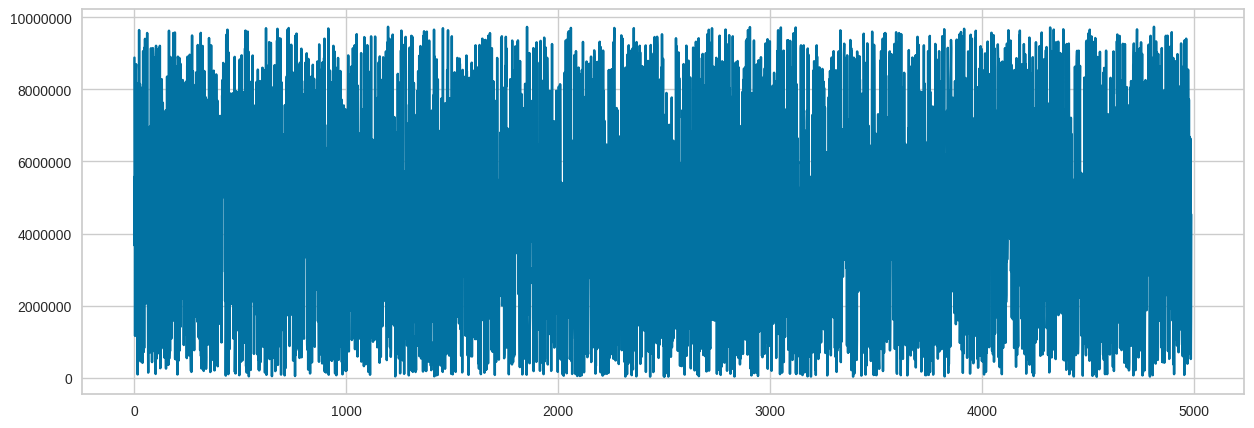

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(y_pred)
plt.ticklabel_format(scilimits=(-5, 8))
plt.show()

In [ ]:
y_test = y_test.reset_index(drop=True)

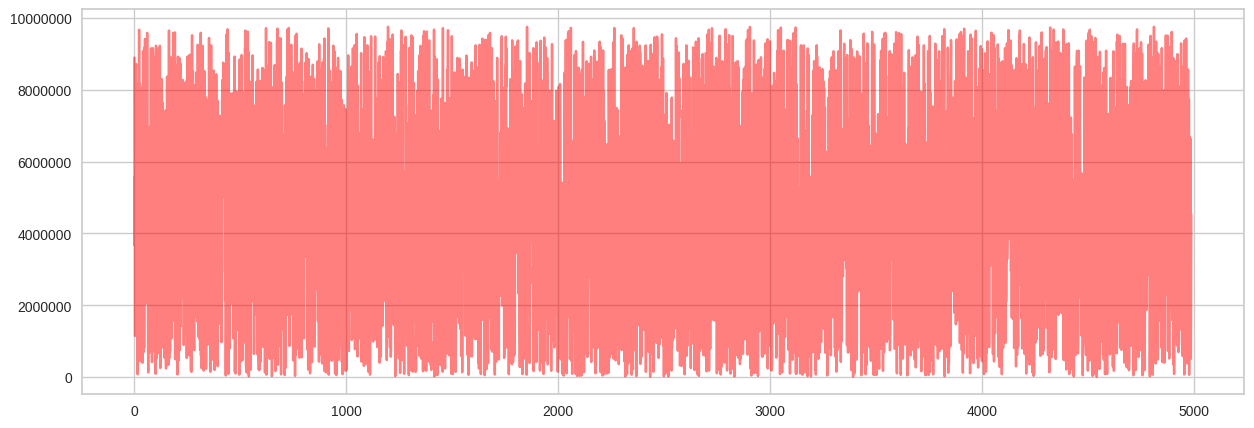

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(y_test, color='red',alpha=0.5)
plt.ticklabel_format(scilimits=(-5, 8))
plt.show()

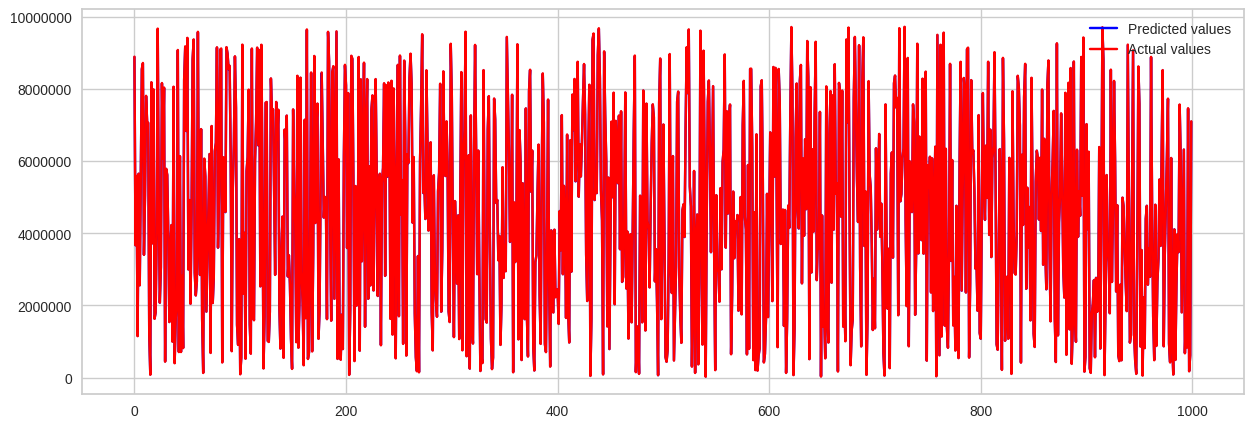

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(y_pred[0:1000],color='blue',label = 'Predicted values')
plt.plot(y_test[0:1000],color='red',label = 'Actual values')
plt.legend()
plt.ticklabel_format(scilimits=(-5, 8))

In [ ]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [ ]:
ytestypred_df = pd.DataFrame({'y_test':y_test,'y_pred':y_pred})

In [ ]:
ytestypred_df

y_test      y_pred
0    8893227.000 8882372.200
1    3668391.600 3669069.898
2    5588845.900 5585218.971
3    1148699.600 1158727.050
4    5651670.300 5648262.003
...          ...         ...
4984 6644576.300 6637013.253
4985 2381470.000 2379190.095
4986  508566.800  516823.095
4987 1645035.900 1645970.946
4988 4540276.800 4528147.739

[4989 rows x 2 columns]

### Model 2

#### RFE with Random Forest

In [302]:
df.columns

Index(['squareMeters', 'numberOfRooms', 'extra_rooms', 'age', 'floors',
       'cityPartRange', 'numPrevOwners', 'isNewBuilt', 'price'],
      dtype='object')

In [303]:
rfe_rf = RFE(estimator=RandomForestRegressor(), n_features_to_select = 4, step = 2, verbose = 1)
rfe_rf.fit(X_train,y_train)
rf_mask = rfe_rf.support_

Fitting estimator with 8 features.
Fitting estimator with 6 features.


In [304]:
rf_ranking = rfe_rf.ranking_

In [305]:
selected_features = X_train.columns[rf_mask]
print("Selected features:", selected_features)

Selected features: Index(['squareMeters', 'floors', 'cityPartRange', 'numPrevOwners'], dtype='object')


In [306]:
print("Feature ranking:", rf_ranking)

Feature ranking: [1 3 2 2 1 1 1 3]


In [307]:
rfe_rf.score(X_train, y_train)

0.9996634174808561

In [308]:
rfe_rf.score(X_test,y_test)

0.9956640622088258

In [309]:
y_pred = rfe_rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse_rf = np.sqrt(mse)
rmse_rf

188248.70792499118

#### Hyperparameter Tuning for RF

In [ ]:
rf = RandomForestRegressor(random_state=42)

In [ ]:
param_grid = {
    'n_estimators': [20, 50, 70],
    'max_depth': [None, 10, 20],
    'min_samples_split':[2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
scoring = {
    'r2': make_scorer(r2_score),
    'rmse': make_scorer(lambda y_true, y_pred: mean_squared_error(y_true, y_pred, squared=False))
}

In [ ]:
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring=scoring, refit='rmse')

In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [20, 50, 70]},
             refit='rmse',
             scoring={'r2': make_scorer(r2_score),
                      'rmse': make_scorer(<lambda>)})

In [ ]:
print("Best parameters found:")
print(grid_search.best_params_)

Best parameters found:
{'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 20}


In [310]:
rf = RandomForestRegressor(n_estimators=20, max_depth=10, min_samples_leaf=4, min_samples_split=10)

In [311]:
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=10,
                      n_estimators=20)

In [312]:
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse_rf_tuned = np.sqrt(mse)
rmse_rf_tuned

188846.52864084663

### Model 3

In [ ]:
X = df.drop('price', axis=1)

In [ ]:
y = df['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)

In [ ]:
adareg = AdaBoostRegressor(n_estimators= 100)

In [ ]:
adareg.fit(X_train, y_train)

AdaBoostRegressor(n_estimators=100)

In [ ]:
y_pred = adareg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse_rf = np.sqrt(mse)
rmse_rf

991985.8885376317

#### Hyperparameter Tuning for AdaBoost

In [ ]:
base_estimator = DecisionTreeRegressor(max_depth=1)

In [ ]:
ada = AdaBoostRegressor(base_estimator=base_estimator)

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 1.0]
}

In [ ]:
scoring = {
    'r2': make_scorer(r2_score),
    'rmse': make_scorer(lambda y_true, y_pred: mean_squared_error(y_true, y_pred, squared=False))
}

In [ ]:
grid_search = GridSearchCV(estimator=ada, param_grid=param_grid, cv=5, scoring=scoring, refit='rmse')

In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=1)),
             param_grid={'learning_rate': [0.1, 1.0],
                         'n_estimators': [50, 100, 200]},
             refit='rmse',
             scoring={'r2': make_scorer(r2_score),
                      'rmse': make_scorer(<lambda>)})

In [ ]:
print("Best parameters found:")
print(grid_search.best_params_)

Best parameters found:
{'learning_rate': 0.1, 'n_estimators': 50}


In [313]:
ada01 = AdaBoostRegressor(n_estimators= 50, learning_rate=0.1)

In [314]:
ada01.fit(X_train, y_train)

AdaBoostRegressor(learning_rate=0.1)

In [315]:
y_pred = ada01.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse_ada01 = np.sqrt(mse)
rmse_ada01

376960.0594903781

#### Model 4

In [ ]:
lgb = lgb.LGBMRegressor(random_state=42)

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 120],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7]
}

In [ ]:
grid_search = GridSearchCV(estimator=lgb, param_grid=param_grid, cv=5, scoring=scoring, refit='rmse', verbose=1)

In [ ]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000596 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1018
[LightGBM] [Info] Number of data points in the train set: 11972, number of used features: 9
[LightGBM] [Info] Start training from score 4505717.031280
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000278 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1018
[LightGBM] [Info] Number of data points in the train set: 11973, number of used features: 9
[LightGBM] [Info] Start training from score 4510215.096209
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000277 seconds.
You can set 

GridSearchCV(cv=5, estimator=LGBMRegressor(random_state=42),
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 120]},
             refit='rmse',
             scoring={'r2': make_scorer(r2_score),
                      'rmse': make_scorer(<lambda>)},
             verbose=1)

In [ ]:
print("Best parameters found:")
print(grid_search.best_params_)

Best parameters found:
{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}


In [316]:
lgb = LGBMRegressor(n_estimators=50, max_depth=3, learning_rate=0.01, random_state=42)

In [317]:
lgb.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000316 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 763
[LightGBM] [Info] Number of data points in the train set: 14966, number of used features: 8
[LightGBM] [Info] Start training from score 4515496.094971


LGBMRegressor(learning_rate=0.01, max_depth=3, n_estimators=50, random_state=42)

In [318]:
y_pred = lgb.predict(X_test)
mse = mean_squared_error(y_pred, y_test)
rmse_lgb = np.sqrt(mse)

In [319]:
rmse_lgb

1749188.924149434

## Model Comparison and Selection

In [320]:
models_df = pd.DataFrame({'Model':['Lasso Regregession','RFE:Random Forest', 'AdaBoost_tuned', 'LightGBM'],
                          'Train R Square':[lcv.score(X_train, y_train),rf.score(X_train, y_train),
                                            ada01.score(X_train, y_train),lgb.score(X_train, y_train)],
                          'Test R Square':[lcv.score(X_test, y_test),rf.score(X_test,y_test),
                                           ada01.score(X_test,y_test), lgb.score(X_test,y_test)],
                          'RMSE':[rmse_lcv, rmse_rf, rmse_ada01, rmse_lgb]})
models_df

Model  Train R Square  Test R Square       RMSE
0  Lasso Regregession            1.00           1.00  190298.68
1   RFE:Random Forest            1.00           1.00  188248.71
2      AdaBoost_tuned            0.98           0.98  376960.06
3            LightGBM            0.63           0.63 1749188.92

In [321]:
#pip install pycaret

In [322]:
from pycaret.regression import *

In [323]:
Step = setup(data=df, target='price')

In [325]:
best_models = compare_models(cross_validation=True)

Processing:   0%|          | 0/81 [00:00<?, ?it/s]

It's not uncommon to observe differences in performance metrics between models trained using different methods or libraries, such as in your case with RandomForestRegressor and PyCaret's RandomForest Regressor.
Potentional reasons:

*   PyCaret's Random Forest Regressor may have automatically performed hyperparameter tuning
*   PyCaret may have automatically handled preprocessing steps
*   PyCaret may have applied automatic feature engineering techniques or feature selection methods
*   PyCaret may have used a different validation strategy (e.g., cross-validation) or a different data split compared to your manual implementation

In [326]:
rf_py = create_model("rf")

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [337]:
#rf_tuned = tune_model(rf_py)

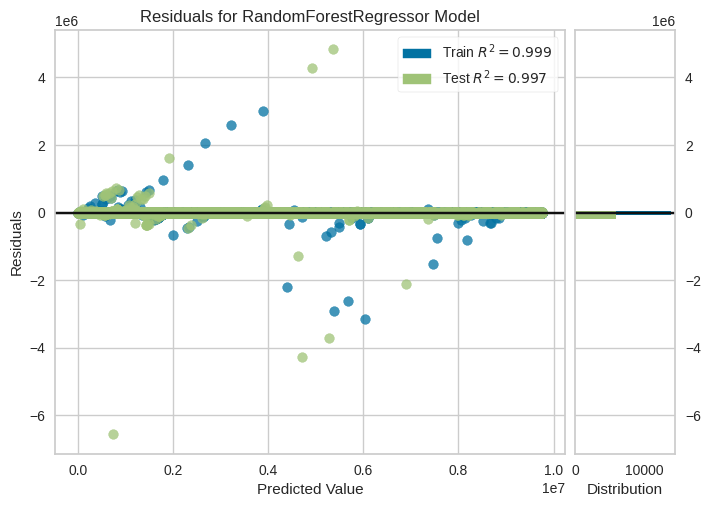

In [329]:
plot_model(rf_py, plot='residuals')

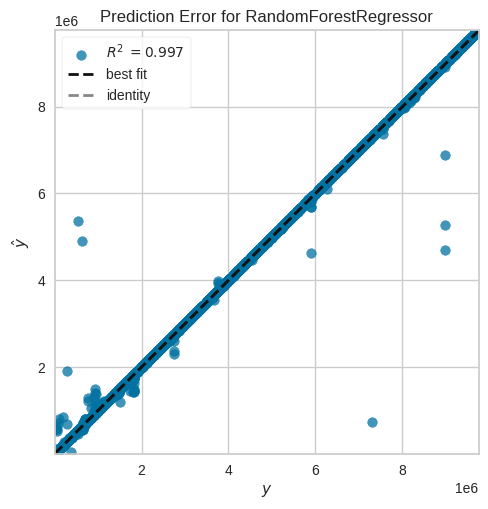

In [330]:
plot_model(rf_py, plot='error')

In [331]:
evaluate_model(rf_py)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

[Click here to go back to the table of content](#Table-of-Content)

## Feature Importance

In [332]:
feature_importances = rf.feature_importances_

In [333]:
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

In [334]:
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

In [335]:
print(feature_importance_df)

         Feature  Importance
0   squareMeters        1.00
4         floors        0.00
3            age        0.00
5  cityPartRange        0.00
6  numPrevOwners        0.00
1  numberOfRooms        0.00
2    extra_rooms        0.00
7     isNewBuilt        0.00


Feature importance with pycaret

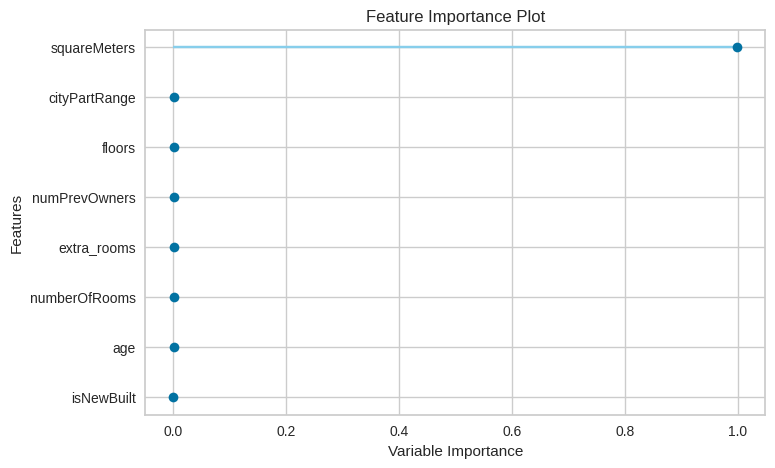

In [336]:
plot_model(rf_py, plot='feature')

[Click here to go back to the table of content](#Table-of-Content)

## Conclusion and Recommendations

Since the target variable has extrmely high values, therefore the RMSE is also very high.

As per expected the most important feature is the squaremeters of the houses.

4 different model assessment:
  Lasso R
  andom Forest
  Adaboost
  LightGBM

Majority of the models have quite high r2 square value above 0.98 and quite high rmse values: 190 124 - 1 749 188.

An R square of 0.9956 implies that the model is a good model as it explains approximately 99% of the variation in the target varible(Price).

Though the model is a good model, arguably, it's Root Mean Square error looks large due to the large value range of the target variable which is in millions. This does not mean the model is bad.

It is also important to note that MSE or RMSE are not bounded, they can take any non-negative values. The only way to judge if the value of the metric is reasonable is by comparing it to some benchmark, like the results of anothere.

Hence,finally chosen model isoose the Random Forest model as the best model for our data

_____________________________________________________ **Thank you** _______________________________________________________

[Click here to go back to the table of content](#Table-of-Content)